## Семинар по линрегу. 192

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/house_prices.csv')

In [5]:
df[['price', 'area']].corr()

,price,area
price,1.000000,0.535997
area,0.535997,1.000000


In [6]:
# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline 

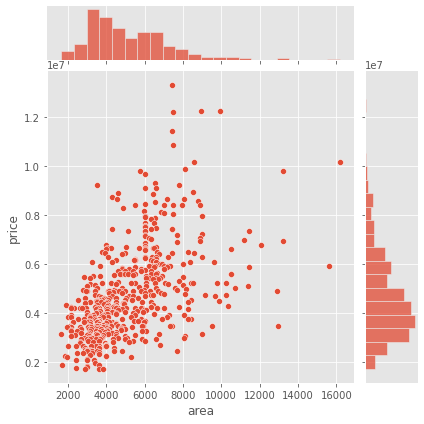

In [7]:
# scatter plot – диаграмма рассеивания

sns.jointplot(x='area', y='price', data=df, kind='scatter')

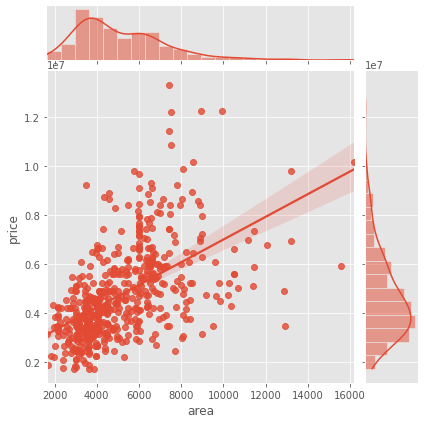

In [12]:
sns.jointplot(x='area', y='price', data=df, kind='reg')

### Подготовим данные для регрессии

In [17]:
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

d = {'yes': 1, 'no': 0}
df[yes_no_cols] = df[yes_no_cols].apply(lambda x: x.map(d))

one-hot encoding

In [25]:
df_dummies = pd.get_dummies(df['furnishingstatus'], drop_first=True)


df = pd.concat([df, df_dummies], axis=1)

In [28]:
df = df.drop('furnishingstatus', axis=1)

### Линейная регрессия

In [ ]:
sklearn

In [35]:
df.columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semifurnished', 'unfurnished']

In [49]:
df['area_2'] = df['area']**2

In [50]:
formula = 'price ~ area + bedrooms + bathrooms + stories + mainroad' \
          '+ guestroom + basement + hotwaterheating + airconditioning' \
          '+ parking + prefarea + semifurnished + unfurnished + area_2'


from statsmodels.formula.api import ols

# ols - ordinary least squares (обычный метод наименьших квадратов)

model = ols(
    formula,
    data=df
).fit()

In [51]:
results_summary = model.summary(alpha=0.01)

In [52]:
results_as_html = results_summary.tables[1].as_html()
pd.read_html(results_as_html, header=0, index_col=0)[0]

,coef,std err,t,P>|t|,[0.005,0.995]
Intercept,-346800.0000,329000.000,-1.055,0.292,-1200000.000,503000.000
area,405.9543,85.198,4.765,0.000,185.707,626.202
bedrooms,118800.0000,72400.000,1.641,0.101,-68400.000,306000.000
bathrooms,984200.0000,103000.000,9.546,0.000,718000.000,1250000.000
stories,443100.0000,64100.000,6.910,0.000,277000.000,609000.000
mainroad,378600.0000,143000.000,2.639,0.009,7780.665,749000.000
guestroom,253900.0000,133000.000,1.903,0.058,-91100.000,599000.000
basement,357400.0000,110000.000,3.248,0.001,72900.000,642000.000
hotwaterheating,859800.0000,223000.000,3.863,0.000,284000.000,1440000.000
airconditioning,832700.0000,109000.000,7.620,0.000,550000.000,1120000.000
